# VGG를 이용한 이미지 처리

In [36]:
import numpy as np
from keras.preprocessing.image import *

In [37]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=15,#0~15,
                  width_shift_range=0.1,#좌우로 각각10픽셀 이내
                  height_shift_range=0.1,#상하로
                  shear_range=0.5, #변형
                  zoom_range=[0.8,2.0],#최소 0.8배 최대 2배
                  horizontal_flip=True,
                  vertical_flip=True)

In [38]:
img = load_img('손글씨/train/triangle/triangle001.png')
x = img_to_array(img) # shape => (24, 24, 3)
x= x.reshape((1,) + x.shape) # 앞에 1은 이미지가 한개 임


In [39]:
i = 1
for batch in train_datagen.flow(x, batch_size = 1 , save_to_dir='myimg', save_prefix = 'tri', save_format = 'png'):
    if i >50:
        break
    i += 1

In [40]:
from keras.applications.vgg16 import VGG16, decode_predictions

In [41]:
vgg = VGG16()
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [42]:
from PIL import Image
# 이미지 관련 패키지 

In [43]:
img = np.array(Image.open('bird.jpeg').resize((224, 224)))

In [44]:
img.shape

(224, 224, 3)

In [45]:
yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
yhat.shape

(1, 1000)

In [46]:
lk = np.argmax(yhat) # 다차원 배열의 경우에 차원에 따라 가장 큰 값의 인덱스를 반환해주는 함수
label = decode_predictions(yhat)
print(label)
print("(%.2f$$)" %(label[0][0][2]*100))

[[('n01532829', 'house_finch', 0.84836435), ('n01530575', 'brambling', 0.07945054), ('n01531178', 'goldfinch', 0.049051892), ('n01537544', 'indigo_bunting', 0.012442896), ('n01828970', 'bee_eater', 0.0062711975)]]
(84.84$$)


In [47]:
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import *
import pandas as pd
import numpy as np

In [48]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [49]:
import pandas as pd

In [50]:
filenames=os.listdir("dogs-vs-cats/train/train")
filenames


['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [51]:
categories = []
for fn in filenames: 
    category = fn.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [52]:
df = pd.DataFrame({'filenames': filenames, 'category': categories})
df
# categorical 칼럼 추가
# 강아지 1, 고양이 0

,filenames,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


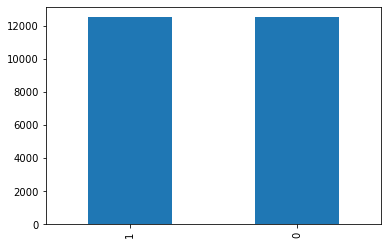

In [53]:
df['category'].value_counts().plot.bar()

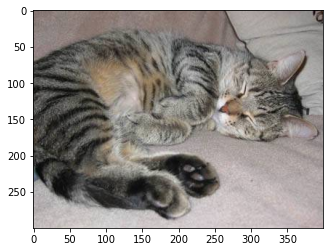

In [54]:
sample = random.choice(filenames)
img = load_img('dogs-vs-cats/train/train/'+sample)
plt.imshow(img)

In [55]:
str(df['filenames'][:3])

'0     cat.0.jpg\n1     cat.1.jpg\n2    cat.10.jpg\nName: filenames, dtype: object'

In [56]:
from keras.models import Sequential
from keras.layers import *


In [57]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(2, activation = 'softmax'))


# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

In [58]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)      

"""
ex)val_loss:3.5 -> 4.5    
tf.keras.callbacks.EarlyStopping(     
    monitor="val_loss", 관찰대상(val_acc도 있음)    
    min_delta=0, 최소 변화량(더 작거나 같으면 중단)       
    patience=10, 개선이 없다고 해서 바로 종료하는게 아니라, 몇 에폭만큼 더 기다려줄래...    
    verbose=0,  
    mode="auto",  
    baseline=None,  
    restore_best_weights=False,  
)  

"""

In [59]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # LR 러닝 레이트

In [60]:
earlystop = EarlyStopping(patience=10)

In [61]:
lrr = ReduceLROnPlateau(monitor = 'val_acc', patience = 2, facrtor = 0.5,  mim_lr = 0.00001)
callback = [earlystop, lrr]

In [62]:
df['category'] = df['category'].replace({0:'dog', 1:'cat'})

In [63]:
trainDf, valDF = train_test_split(df, test_size = 0.2, random_state = 42)

In [64]:
trainDf['category'].value_counts()

cat    10015
dog     9985
Name: category, dtype: int64

In [65]:
trainDf.shape

(20000, 2)

In [66]:
totalTrain = trainDf.shape[0]
totalVal = valDF.shape[0]
batch_size = 15

In [67]:
trainDf.head() #데티어 프레임으로 저장됨

trainDf = trainDf.reset_index(drop =True)
valDF = valDF.reset_index(drop = True)

In [68]:
trainDatagen = ImageDataGenerator(rotation_range= 15 , rescale = 1./255, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

In [73]:
trainGenerator = trainDatagen.flow_from_dataframe(trainDf, 'dogs-vs-cats/train/train/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 20000 validated image filenames belonging to 2 classes.


# 검증 제너레이터

In [74]:
validDatagen = ImageDataGenerator(rescale = 1./255)

vaildGenerator = trainDatagen.flow_from_dataframe(trainDf, 'dogs-vs-cats/train/train/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [79]:
exampleDf = trainDf.sample(1).reset_index(drop = True)


exampleGenerator = trainDatagen.flow_from_dataframe(exampleDf, 'dogs-vs-cats/train/train/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 1 validated image filenames belonging to 1 classes.


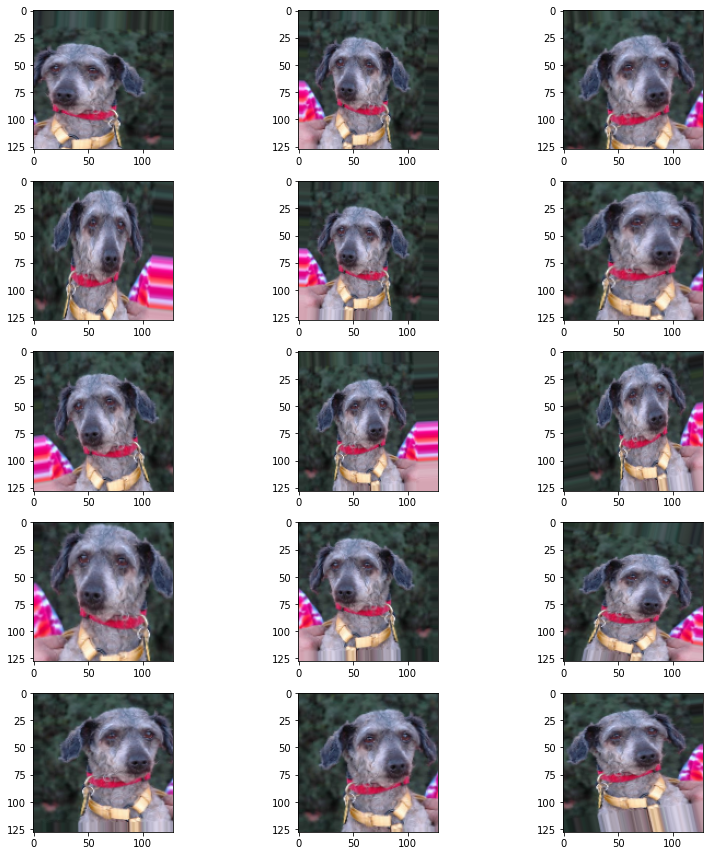

In [82]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5,3,i+1)
    for xb, yb in exampleGenerator:
        img = xb[0]
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

In [84]:
totalTrain = trainDf.shape[0]
totalValid = valDF.shape[0]
print(totalTrain, totalValid)

20000 5000


In [88]:
epochs = 3
history = model.fit_generator(
    trainGenerator, 
    epochs= epochs,
    validation_data = vaildGenerator,
    validation_steps=totalValid//batch_size,
    steps_per_epoch=totalTrain//batch_size,
    callbacks = callback
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
1333/1333 [==============================] - 555s 416ms/step - loss: 0.6843 - accuracy: 0.6297 - val_loss: 0.5934 - val_accuracy: 0.6785 - lr: 0.0010
Epoch 2/3
1333/1333 [==============================] - 521s 391ms/step - loss: 0.6001 - accuracy: 0.6914 - val_loss: 0.5904 - val_accuracy: 0.6855 - lr: 0.0010
Epoch 3/3
1333/1333 [==============================] - 527s 395ms/step - loss: 0.5695 - accuracy: 0.7180 - val_loss: 0.5190 - val_accuracy: 0.7688 - lr: 0.0010
